In [1]:
import torchvision.io as tio
from torch.utils.data import DataLoader 
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [16]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load the training dataset
train_dataset = datasets.MNIST(root='../dataset/data', train=True, download=False, transform=transform)

# Load the testing dataset
test_dataset = datasets.MNIST(root='../dataset/data', train=False, download=False, transform=transform)


In [37]:
# Create data loaders
batch_size = 64
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)


Label:  torch.Size([64]) torch.Size([64, 1, 28, 28])


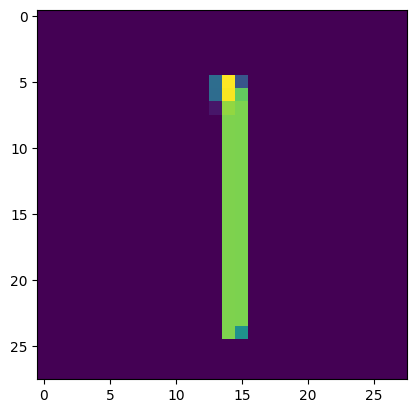

In [25]:
for id, image_data in enumerate(train_loader, 0):
    hand_image, target = image_data 
    print("Label: ", target.shape, hand_image.shape)
    plt.imshow(hand_image[0].permute(1,2,0))
    break

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [43]:
model = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [44]:
model

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [34]:
epochs = 100

for epoch in range(epochs):
    for id, image_data in enumerate(train_loader, 0):
        hand_image, target = image_data
        optimizer.zero_grad()
        logits = model(hand_image)

        loss = criterion(logits, target)

        loss.backward()
        optimizer.step()
    
    print(f'Loss at epoch {epoch}: {loss}')


        

Loss at epoch 0: 0.3834443688392639


KeyboardInterrupt: 

tensor([4]) tensor([7])


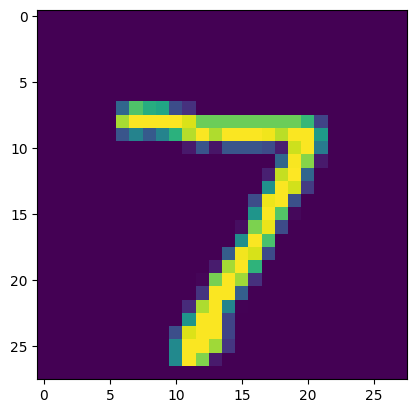

In [45]:
for i, image_row in enumerate(test_loader, 0):
    # zero the parameter gradients
    image_data, target = image_row
    logits = model(image_data)

    _, predicted = torch.max(logits, 1)
    plt.imshow(image_data[0].permute(1,2,0))
    print(predicted, target)
    
    break

In [46]:
totals = 0
correct = 0

for i, image_row in enumerate(test_loader, 0):
    # zero the parameter gradients
    image_data, target = image_row
    logits = model(image_data)

    _, predicted = torch.max(logits, 1)

    if predicted[0] == target[0]:
        correct += 1
    totals += 1

accuracy = correct / totals * 100
accuracy

9.67